
## Business Case: Yulu - Hypothesis Testing

### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### PROBLEM STATEMENT
The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands



### Importing necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Import the dataset

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

### DATA STRUCTURE AND CHARACTERISTICS

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.shape

(10886, 12)

### Converting some categorical attributes to 'category' data type.

In [ ]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday']=df['workingday'].astype('category')
df['weather']=df['weather'].astype('category')

In [ ]:
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## CHECK FOR MISSING VALUES

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

data has no missing values.

## Univariate Analysis - Distribution plots

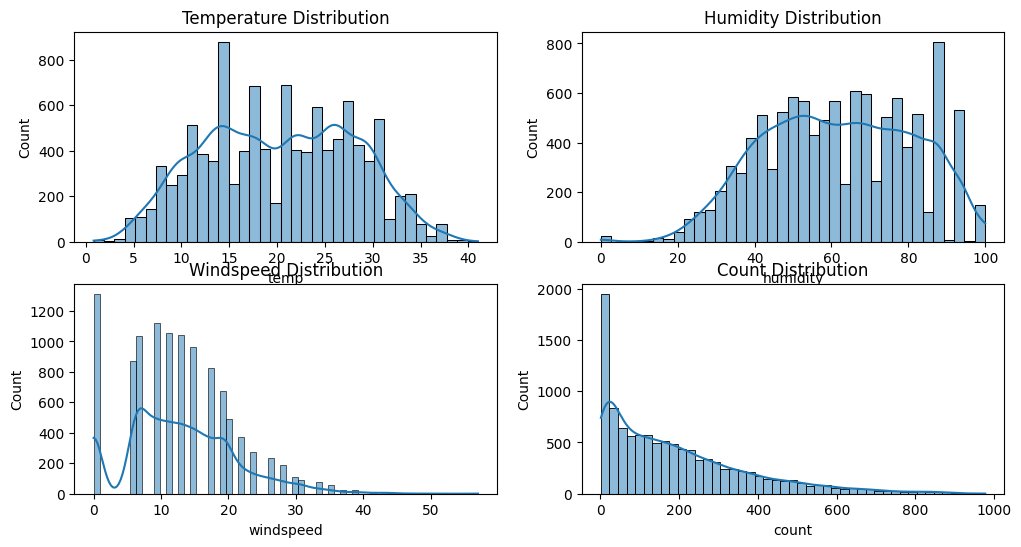

In [ ]:
fig=plt.figure(figsize=(12, 6))
rows=2
cols=2
fig.add_subplot(rows,cols,1)
sns.histplot(df['temp'], kde=True)
plt.title('Temperature Distribution')

fig.add_subplot(rows,cols,2)
sns.histplot(df['humidity'], kde=True)
plt.title('Humidity Distribution')

fig.add_subplot(rows,cols,3)
sns.histplot(df['windspeed'], kde=True)
plt.title('Windspeed Distribution')

fig.add_subplot(rows,cols,4)
sns.histplot(df['count'], kde=True)
plt.title('Count Distribution')

plt.show()

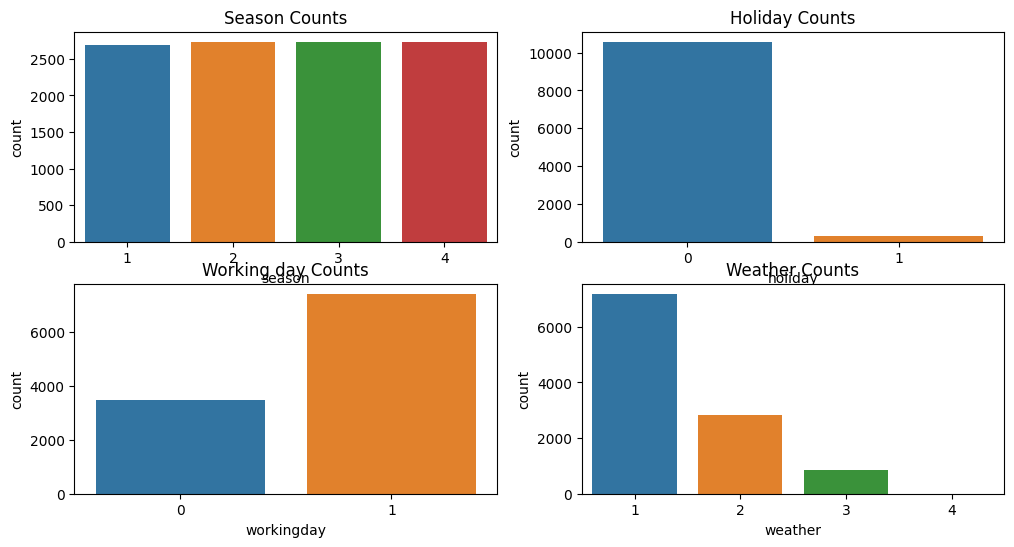

In [ ]:
# Barplots/Countplots for categorical variables

fig=plt.figure(figsize=(12, 6))
rows=2
cols=2

fig.add_subplot(rows,cols,1)
sns.countplot(x='season', data=df)
plt.title('Season Counts')

fig.add_subplot(rows,cols,2)
sns.countplot(x='holiday', data=df)
plt.title('Holiday Counts')

fig.add_subplot(rows,cols,3)
sns.countplot(x='workingday', data=df)
plt.title('Working day Counts')

fig.add_subplot(rows,cols,4)
sns.countplot(x='weather', data=df)
plt.title('Weather Counts')
plt.show()

## Bivariate Representation

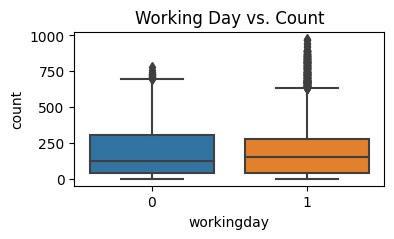

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Working Day vs. Count')
plt.show()

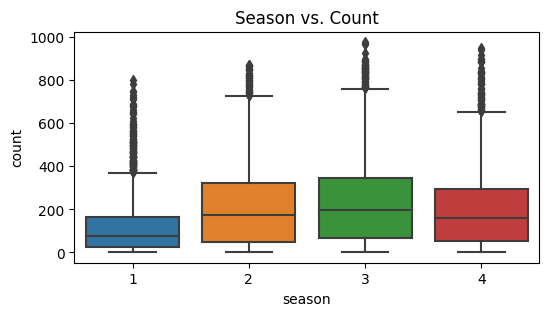

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='season', y='count', data=df)
plt.title('Season vs. Count')
plt.show()

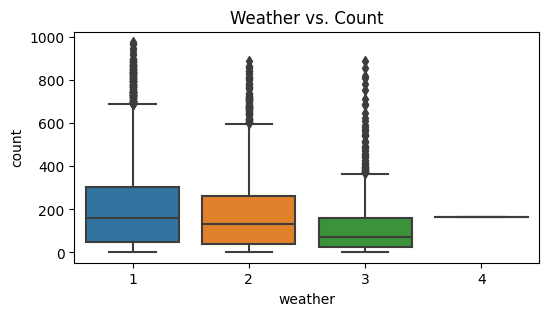

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Weather vs. Count')
plt.show()

## HYPOTHESIS TESTING

### T-Test for working days vs count

H0 (Null Hypothesis): There is no significant difference in the number of electric cycles rented between working and non-working days.

H1 (Alternate Hypothesis): There is a significant difference in the number of electric cycles rented between working and non-working days.

In [ ]:
workingday_yes = df[df['workingday'] == 1]['count']
workingday_no = df[df['workingday'] == 0]['count']

t_stat, p_value = stats.ttest_ind(workingday_yes, workingday_no)
print("P-value",p_value)
# significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in counts between working and non-working days.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in counts between working and non-working days.")

P-value 0.22644804226361348
Fail to reject the null hypothesis. There is no significant difference in counts between working and non-working days.


There is a lot of overlapping for working and non working interval So this attribute has less impact on dependent variabe Count.

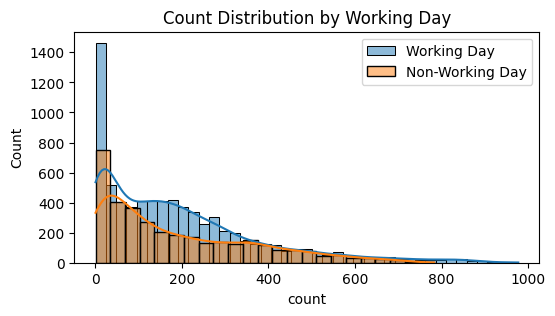

Levene's Test p-value: 0.9437823280916695


In [ ]:
# visualising
plt.figure(figsize=(6, 3))
sns.histplot(workingday_yes, kde=True, label='Working Day')
sns.histplot(workingday_no, kde=True, label='Non-Working Day')
plt.title('Count Distribution by Working Day')
plt.legend()
plt.show()

# Check equal variance assumption using Levene's test
_, p_levene = stats.levene(workingday_yes, workingday_no)

print(f"Levene's Test p-value: {p_levene}")


 the p-value is high, it indicates that there is no strong evidence to suggest unequal variances.

### ANOVA

H0: The means of counts are equal across different weather and season categories.

H1: At least one group mean is different from the others.

In [ ]:
weather_groups = df['weather'].unique()
weather_data = [df[df['weather'] == group]['count'] for group in weather_groups]

f_stat_weather, p_value_weather = stats.f_oneway(*weather_data)
print("For Weather",p_value_weather)
season_groups = df['season'].unique()
season_data = [df[df['season'] == group]['count'] for group in season_groups]

f_stat_season, p_value_season = stats.f_oneway(*season_data)
print("For Season",p_value_season)
alpha = 0.05

if p_value_weather < alpha:
    print("Reject the null hypothesis for weather. Counts are different across weather categories.")
else:
    print("Fail to reject the null hypothesis for weather. Counts are similar across weather categories.")

if p_value_season < alpha:
    print("Reject the null hypothesis for season. Counts are different across season categories.")
else:
    print("Fail to reject the null hypothesis for season. Counts are similar across season categories.")


For Weather 5.482069475935669e-42
For Season 6.164843386499654e-149
Reject the null hypothesis for weather. Counts are different across weather categories.
Reject the null hypothesis for season. Counts are different across season categories.


It means Weather and Season has effect on count of YULU bikes.

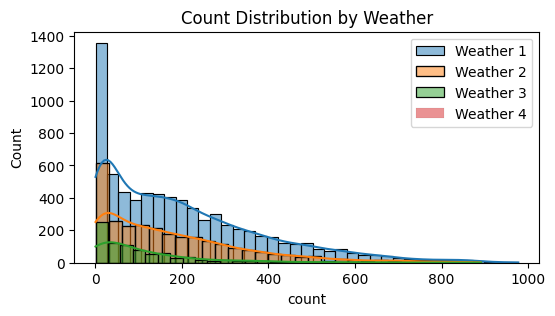

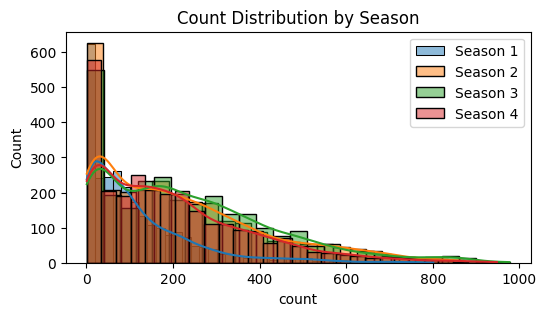

Levene's Test p-value for Weather: 3.504937946833238e-35
Levene's Test p-value for Season: 1.0147116860043298e-118


In [ ]:
# Check normality assumption for weather groups
plt.figure(figsize=(6, 3))
for group, data in zip(weather_groups, weather_data):
    sns.histplot(data, kde=True, label=f'Weather {group}')
plt.title('Count Distribution by Weather')
plt.legend()
plt.show()

# Check equal variance assumption using Levene's test for weather
_, p_levene_weather = stats.levene(*weather_data)

# Check normality assumption for season groups
plt.figure(figsize=(6, 3))
for group, data in zip(season_groups, season_data):
    sns.histplot(data, kde=True, label=f'Season {group}')
plt.title('Count Distribution by Season')
plt.legend()
plt.show()

# Check equal variance assumption using Levene's test for season
_, p_levene_season = stats.levene(*season_data)

# Report Levene's test results
print(f"Levene's Test p-value for Weather: {p_levene_weather}")
print(f"Levene's Test p-value for Season: {p_levene_season}")


Levene's test yields a low p-value , it suggests that the variances are significantly different among the groups.

### Chi-Square

H0: Weather and season are independent of each other.

H1: Weather and season are dependent on each other.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform chi-square test
chi2, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square value",p_value_chi2)
alpha = 0.05

if p_value_chi2 < alpha:
    print("Reject the null hypothesis. Weather is dependent on season.")
else:
    print("Fail to reject the null hypothesis. Weather is independent of season.")


Chi-square value 1.5499250736864862e-07
Reject the null hypothesis. Weather is dependent on season.


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['workingday'], df['holiday'])

# Perform chi-square test
chi2, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)

print("Chi-square value",p_value_chi2)
alpha = 0.05

if p_value_chi2 < alpha:
    print("Reject the null hypothesis. Working  days is dependent on Holidays.")
else:
    print("Fail to reject the null hypothesis. Working days is independent of Holidays.")

Chi-square value 7.274717892533614e-150
Reject the null hypothesis. Weather is dependent on season.


#INFERENCE

Out of **Working Days**, **Holidays**, **Weather**, **Season**

Working days and Holidays has no effect on counts of Yulu.
Weather and Seasons has significant effect on Yulu Counts.

Working Days and Holiday are dependent on each other.
Weather and Season are dependent on each other.